In [1]:
import ssms 
import lanfactory
import os
import sys
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scripts
from copy import deepcopy
import hddm
import torch

In [2]:
from lanfactory.trainers.torch_mlp import TorchMLP  
network_config = pickle.load(open('nets/02c770c6e3a511ecbfa5ac1f6bfea5a4_ds_conflict_drift_torch__network_config.pickle', 'rb'))
torch_net = TorchMLP(network_config = network_config,
                     input_shape = 12,
                     generative_model_id = None)
torch_net.load_state_dict(torch.load('nets/02c770c6e3a511ecbfa5ac1f6bfea5a4_ds_conflict_drift_torch_state_dict.pt', 
                               map_location=torch.device('cpu')))

tanh
tanh
tanh
linear


<All keys matched successfully>

In [25]:
# Fix some parameters
from ssms.basic_simulators import simulator

model = 'ds_conflict_drift'
theta = ssms.config.model_config[model]['default_params'] 
theta[ssms.config.model_config[model]['params'].index('tfixedp')] = 1
theta[ssms.config.model_config[model]['params'].index('a')] = 1.5
theta[ssms.config.model_config[model]['params'].index('tinit')] = 0
theta[ssms.config.model_config[model]['params'].index('dinit')] = 0
theta[ssms.config.model_config[model]['params'].index('tcoh')] = 1
theta[ssms.config.model_config[model]['params'].index('dcoh')] = 1
theta[ssms.config.model_config[model]['params'].index('t')] = 0
sim_out = simulator(model = model, 
                    theta = theta,
                    n_samples = 10000)

#torch_net(torch.Tensor(np.zeros((1000, 12))))

In [37]:
tmp = np.concatenate([np.tile(theta, (2000, 1)), np.zeros((2000, 2))], axis = 1)
tmp[:1000, -2] = np.linspace(0, 10, 1000)
tmp[1000:, -2] = np.linspace(0, 10, 1000)
tmp[:1000, -1] = 1.
tmp[1000:, -1] = -1.

In [38]:
tmp_tensor = torch.Tensor(tmp)

In [44]:
out = torch_net(tmp_tensor)

In [49]:
out_tmp = out.detach().squeeze().numpy()

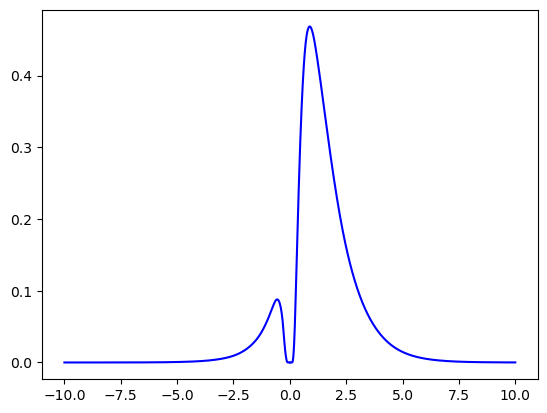

In [56]:
plt.plot(np.linspace(0, 10, 1000), np.exp(out_tmp[:1000]), color = 'blue')
plt.plot(np.linspace(0, -10, 1000), np.exp(out_tmp[1000:]), color = 'blue')
plt.show()

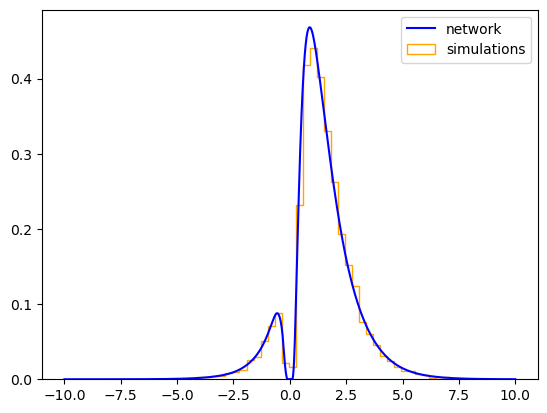

In [60]:
plt.hist(sim_out['rts'] * sim_out['choices'], bins = 50, histtype = 'step', density = True, color = 'orange', label = 'simulations')
plt.plot(np.linspace(0, 10, 1000), np.exp(out_tmp[:1000]), color = 'blue', label = 'network')
plt.plot(np.linspace(0, -10, 1000), np.exp(out_tmp[1000:]), color = 'blue')
plt.legend()
plt.show()

In [18]:
from ssms.basic_simulators.drift_functions import ds_conflict_drift

In [23]:
out = ds_conflict_drift(t = np.arange(0, 10, 0.001),
                       fixed_p_t = 5)

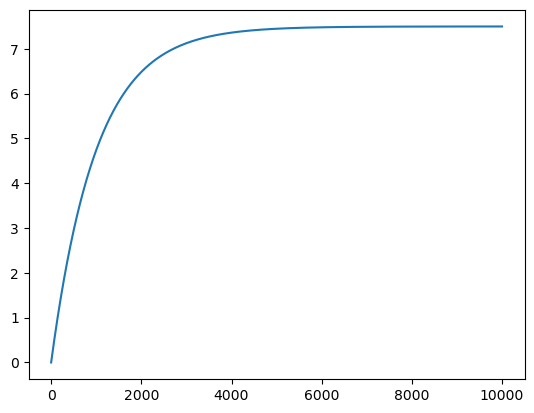

In [24]:
plt.plot(out)
plt.show()